In [1]:
import pandas as pd
import numpy as np

# Data Loading: Training Data

In [2]:
df_placement_train = pd.read_excel("../dataset/Prediction of Placement Status Data/01 Train Data.xlsx")
df_placement_train.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed
3,Pooja,pooja@xyz.com,1,NaN,Art of Resume Building,2.213988e+09,NaN,Free Order,USD,0,...,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,NaN,8.7,2,5,Not placed
4,Aayush,aayush@xyz.com,1,NaN,Art of Resume Building,2.214567e+09,NaN,Free Order,USD,0,...,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,NaN,9.1,3,5,Placed


In [3]:
df_placement_train.shape

(4894, 23)

In [4]:
# Find duplicates based on the Email column
duplicates = df_placement_train[df_placement_train.duplicated(subset='Email ID', keep=False)]

# Display the count of duplicates
print("Count of duplicate rows based on Email column:", duplicates.shape[0])

# Drop the duplicates, keeping the first occurrence
df_placement_train = df_placement_train.drop_duplicates(subset='Email ID', keep='first')

# Display the number of rows after dropping duplicates
print("Number of rows after dropping duplicates:", df_placement_train.shape[0])

Count of duplicate rows based on Email column: 3585
Number of rows after dropping duplicates: 1987


# Data Cleaning: Handle NA values

In [5]:
df_placement_train.columns

Index(['First Name', 'Email ID', 'Quantity', 'Price Tier', 'Ticket Type',
       'Attendee #', 'Group', 'Order Type', 'Currency', 'Total Paid',
       'Fees Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing',
       'Attendee Status', 'College Name',
       'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'CGPA', 'Speaking Skills',
       'ML Knowledge', 'Placement Status'],
      dtype='object')

In [6]:
df_placement_train_dropped = df_placement_train.drop(['First Name', 'Email ID', 'Quantity', 'Price Tier', 'Attendee #', 'Group', 'Order Type', 'Currency', 'Total Paid',
       'Fees Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing','How did you come to know about this event?', 'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation','Year of Graduation','Ticket Type'], axis='columns')


df_placement_train_dropped.shape

(1987, 6)

In [7]:
df_placement_train_dropped.head()

,Attendee Status,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,6.7,2,5,Placed
1,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,8.2,3,2,Not placed
2,Attending,Don Bosco College of Engineering Fatorda Goa,6.5,4,3,Not placed
3,Attending,Pillai College of Engineering New Panvel,8.7,2,5,Not placed
4,Attending,St Xavier's College,9.1,3,5,Placed


In [8]:
df_placement_train_dropped['Attendee Status'].unique()

array(['Attending', 'NAN'], dtype=object)

In [9]:
# Replacing 'NAN' with 'Non-Attending' in the 'Attendee Status' column
df_placement_train_dropped['Attendee Status'] = df_placement_train_dropped['Attendee Status'].replace('NAN', 'Non-Attending')

df_placement_train_dropped['Attendee Status'].unique()


array(['Attending', 'Non-Attending'], dtype=object)

In [10]:
# Replacing 'Attending' with 1 and 'Non-Attending' with 0 in the 'Attendee Status' column
df_placement_train_dropped['Attendee Status'] = df_placement_train_dropped['Attendee Status'].replace({
    'Attending': 1,
    'Non-Attending': 0
})

df_placement_train_dropped['Attendee Status'].unique()

array([1, 0], dtype=int64)

In [11]:
df_placement_train_dropped['Placement Status'].unique()

array(['Placed', 'Not placed', nan], dtype=object)

In [12]:
# Replacing nan with 'Not placed' in the 'Placement Status' column
df_placement_train_dropped['Placement Status'] = df_placement_train_dropped['Placement Status'].fillna('Not placed')

df_placement_train_dropped['Placement Status'].unique()

array(['Placed', 'Not placed'], dtype=object)

In [13]:
df_placement_train_dropped['Placement Status'] = df_placement_train_dropped['Placement Status'].replace({
    'Placed': 1,
    'Not placed': 0
})

df_placement_train_dropped['Placement Status'].unique()

array([1, 0], dtype=int64)

In [14]:
df_placement_train_dropped.isna().sum()

Attendee Status      0
College Name        10
CGPA                 0
Speaking Skills      0
ML Knowledge         0
Placement Status     0
dtype: int64

In [15]:
df_placement_train_dropped.shape

(1987, 6)

In [16]:
df_placement_train_dropped_na = df_placement_train_dropped.dropna()
df_placement_train_dropped_na.isna().sum()

Attendee Status     0
College Name        0
CGPA                0
Speaking Skills     0
ML Knowledge        0
Placement Status    0
dtype: int64

In [17]:
df_placement_train_dropped_na.shape

(1977, 6)

In [18]:
df_placement_train_dropped_na['Speaking Skills'].unique()

array([2, 3, 4, 5, 1], dtype=int64)

In [19]:
df_placement_train_dropped_na['ML Knowledge'].unique()

array([5, 2, 3, 4, 1], dtype=int64)

In [20]:
df_placement_train_dropped_na['College Name'].unique()

array(['D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE',
       'AP SHAH INSTITUTE OF TECHNOLOGY ',
       'Don Bosco College of Engineering Fatorda Goa',
       'Pillai College of Engineering New Panvel', "St Xavier's College ",
       'Vidyalankar Institute of Technology, Mumbai',
       'S.I.E.S. Graduate School Of Technology, Nerul, Navi Mumbai',
       'G H Raisoni institut of engineering and technology pune',
       'GOVERNMENT POLYTECHNIC GANDHINAGAR',
       'B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan',
       'Vishwakarma Institute of Technology, Pune',
       "KLE Society's College of BCA, RLS Institute, Belagavi",
       'Priyadarshini college of engineering, Nagpur ',
       'St.Francis Institute of Technology',
       'New horizon institute of Technology and Management ',
       'Late G. N. Sapkal College Of Engineering',
       'Symbiosis Institute of Technology, Pune',
       'MIT Academy Of Engineering ,Alandi',
       'A. C. Patil Colle

In [21]:
# Filter out rows where 'College Name' is 'na'
df_placement_train_filtered = df_placement_train_dropped_na[df_placement_train_dropped_na['College Name'] != 'na']

unique_college_names_train_filtered = df_placement_train_filtered['College Name'].unique()
print("The unique sum of 'College Name' values in the filtered train dataset is:", len(unique_college_names_train_filtered))

The unique sum of 'College Name' values in the filtered train dataset is: 54


In [22]:
df_placement_train_filtered['College Name'] = df_placement_train_filtered['College Name'].str.strip()

C:\Users\mansh\AppData\Local\Temp\ipykernel_3632\3345167773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placement_train_filtered['College Name'] = df_placement_train_filtered['College Name'].str.strip()


In [23]:
import json
unique_colleges = df_placement_train_filtered['College Name'].unique()

json_file_path = 'college_names.json'

with open(json_file_path, 'w') as f:
    json.dump({'college_names': list(unique_colleges)}, f, indent=4)

print(f'Unique college names stored in {json_file_path}')

Unique college names stored in college_names.json


## Using One Hot Encoding For College Name

In [24]:
dummies_train = pd.get_dummies(df_placement_train_filtered['College Name'])
dummies_train.shape

(1975, 54)

In [25]:
df_final_train = pd.concat([df_placement_train_filtered, dummies_train], axis='columns')
df_final_train.head()

,Attendee Status,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status,A. C. Patil College of Engineering,ADHIYAMAAN COLLEGE OF ENGINEERING,AP SHAH INSTITUTE OF TECHNOLOGY,"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",...,"priyadarshini college of engineering, nagpur","s.i.e.s. graduate school of technology, nerul, navi mumbai",silicon institute of technology,st xavier's college,st.francis institute of technology,"symbiosis institute of technology, pune","thakur institute of management studies, career development & research - [timscdr]","vidyalankar institute of technology, mumbai","vishwakarma institute of technology, pune",wilson college
0,1,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,6.7,2,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,AP SHAH INSTITUTE OF TECHNOLOGY,8.2,3,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Don Bosco College of Engineering Fatorda Goa,6.5,4,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Pillai College of Engineering New Panvel,8.7,2,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,St Xavier's College,9.1,3,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_final_train1 = df_final_train.drop(['College Name'], axis='columns')

df_final_train1.shape

(1975, 59)

In [27]:
df_final_train1.head()

,Attendee Status,CGPA,Speaking Skills,ML Knowledge,Placement Status,A. C. Patil College of Engineering,ADHIYAMAAN COLLEGE OF ENGINEERING,AP SHAH INSTITUTE OF TECHNOLOGY,"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI,...,"priyadarshini college of engineering, nagpur","s.i.e.s. graduate school of technology, nerul, navi mumbai",silicon institute of technology,st xavier's college,st.francis institute of technology,"symbiosis institute of technology, pune","thakur institute of management studies, career development & research - [timscdr]","vidyalankar institute of technology, mumbai","vishwakarma institute of technology, pune",wilson college
0,1,6.7,2,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8.2,3,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6.5,4,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8.7,2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9.1,3,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
x = df_final_train1.drop(['Placement Status'], axis='columns')
x.head(3)

,Attendee Status,CGPA,Speaking Skills,ML Knowledge,A. C. Patil College of Engineering,ADHIYAMAAN COLLEGE OF ENGINEERING,AP SHAH INSTITUTE OF TECHNOLOGY,"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE,...,"priyadarshini college of engineering, nagpur","s.i.e.s. graduate school of technology, nerul, navi mumbai",silicon institute of technology,st xavier's college,st.francis institute of technology,"symbiosis institute of technology, pune","thakur institute of management studies, career development & research - [timscdr]","vidyalankar institute of technology, mumbai","vishwakarma institute of technology, pune",wilson college
0,1,6.7,2,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,8.2,3,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6.5,4,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y = df_final_train1['Placement Status']
y.head(3)

0    1
1    0
2    0
Name: Placement Status, dtype: int64

# Model Training

### Spliting Data into x_train, y_train, x_test, y_test for training the model

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [31]:
from sklearn import tree
import sklearn
print(sklearn.__version__)
model = tree.DecisionTreeClassifier()

1.2.2


In [32]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
model.score(x_test, y_test)

0.8253164556962025

In [34]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model accuracy: 0.8253164556962025
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       357
           1       0.12      0.13      0.13        38

    accuracy                           0.83       395
   macro avg       0.51      0.52      0.51       395
weighted avg       0.83      0.83      0.83       395

Confusion Matrix:
[[321  36]
 [ 33   5]]


# Export the tested model to a pickle file

In [35]:
import joblib

with open('placement_prediction_model.pkl', 'wb') as f:
    joblib.dump(model, f)


## Plotting top 10 colleges by Placement Count

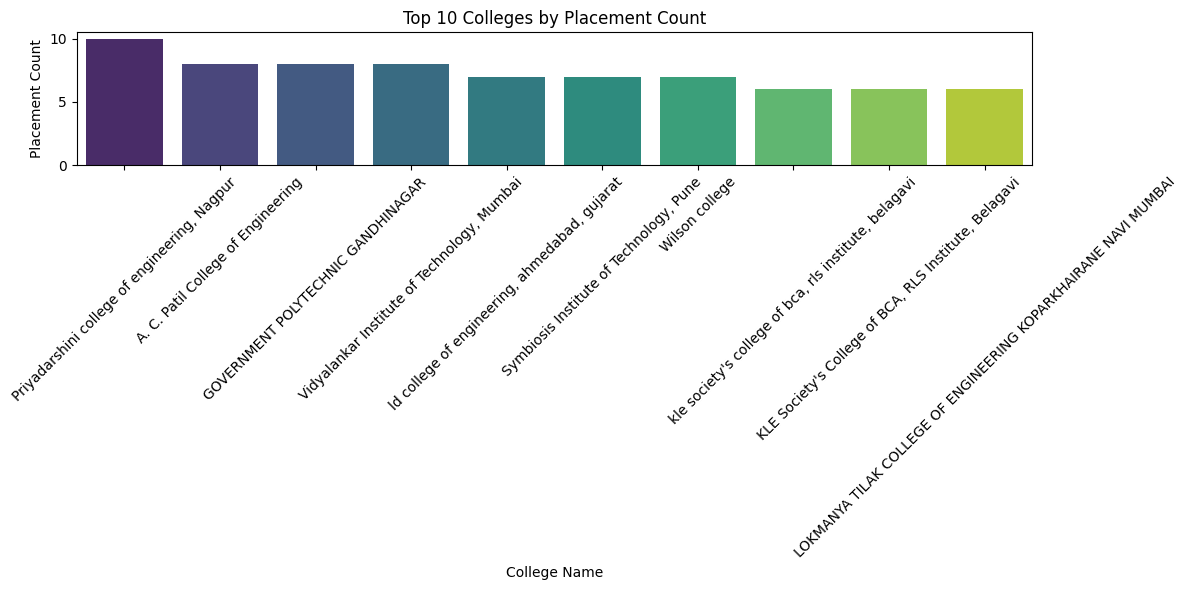

                                         College Name  Placement Count
16       Priyadarshini college of engineering, Nagpur               10
0                  A. C. Patil College of Engineering                8
8                  GOVERNMENT POLYTECHNIC GANDHINAGAR                8
22        Vidyalankar Institute of Technology, Mumbai                8
33      ld college of engineering, ahmedabad, gujarat                7
21            Symbiosis Institute of Technology, Pune                7
24                                     Wilson college                7
31  kle society's college of bca, rls institute, b...                6
9   KLE Society's College of BCA, RLS Institute, B...                6
11  LOKMANYA TILAK COLLEGE OF ENGINEERING KOPARKHA...                6


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

placement_counts = df_final_train[df_final_train['Placement Status'] == 1].groupby('College Name').size().reset_index(name='Placement Count')

top_10_colleges = placement_counts.sort_values(by='Placement Count', ascending=False).head(10)

if not top_10_colleges.empty:
    # Plotting the top 10 colleges
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_colleges, x='College Name', y='Placement Count', palette='viridis')
    plt.title('Top 10 Colleges by Placement Count')
    plt.xlabel('College Name')
    plt.ylabel('Placement Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot.")

print(top_10_colleges)


# Data Loading: Testing Data

In [37]:
df_placement_test = pd.read_excel("../dataset/Prediction of Placement Status Data/02 Test Data.xlsx")
df_placement_test.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,1,NaN,Hello ML and DL,2.293940e+09,NaN,Free Order,USD,0,...,Attending,"symbiosis institute of technology, pune",Whatsapp,NaN,Students,NaN,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",Whatsapp,NaN,Students,NaN,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,Whatsapp,NaN,Students,NaN,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,1,NaN,Hello ML and DL,2.293946e+09,NaN,Free Order,USD,0,...,Attending,wilson college,Others,NaN,Students,NaN,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,1,NaN,Hello ML and DL,2.293956e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",Whatsapp,NaN,Students,NaN,6.7,5,5,NaN


In [38]:
df_placement_test1 = df_placement_test.drop(['Quantity', 'Price Tier', 'Attendee #', 'Group', 'Order Type', 'Currency', 'Total Paid',
       'Fees Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing','How did you come to know about this event?', 'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation','Year of Graduation','Ticket Type','Placement Status'], axis='columns')


df_placement_test1.shape

(3796, 7)

# Data Cleaning: Handle NA values

In [39]:
df_placement_test1.isna().sum()

First Name         0
Email ID           0
Attendee Status    0
College Name       1
CGPA               0
Speaking Skills    0
ML Knowledge       0
dtype: int64

In [40]:
df_placement_test1_dropped_na = df_placement_test1.dropna()
df_placement_test1_dropped_na.isna().sum()

First Name         0
Email ID           0
Attendee Status    0
College Name       0
CGPA               0
Speaking Skills    0
ML Knowledge       0
dtype: int64

In [41]:
df_placement_test1_dropped_na.head()

,First Name,Email ID,Attendee Status,College Name,CGPA,Speaking Skills,ML Knowledge
0,Sahil,sahil@xyz.com,Attending,"symbiosis institute of technology, pune",7.8,3,3
1,Amrita,amrita@xyz.com,Attending,"mit academy of engineering ,alandi",9.1,3,3
2,Mamta,mamta@xyz.com,Attending,a. c. patil college of engineering,6.9,2,2
3,Bhagyashri,bhagyashri@xyz.com,Attending,wilson college,8.4,4,4
4,Divyanshu,divyanshu@xyz.com,Attending,"ld college of engineering, ahmedabad, gujarat",6.7,5,5


In [42]:
df_placement_test1_dropped_na.shape

(3795, 7)

In [43]:
df_placement_test1_dropped_na.columns

Index(['First Name', 'Email ID', 'Attendee Status', 'College Name', 'CGPA',
       'Speaking Skills', 'ML Knowledge'],
      dtype='object')

In [44]:
df_placement_test_final = df_placement_test1_dropped_na.drop(['First Name', 'Email ID'], axis='columns')


df_placement_test_final.shape

(3795, 5)

In [45]:
df_placement_test_final.head()

,Attendee Status,College Name,CGPA,Speaking Skills,ML Knowledge
0,Attending,"symbiosis institute of technology, pune",7.8,3,3
1,Attending,"mit academy of engineering ,alandi",9.1,3,3
2,Attending,a. c. patil college of engineering,6.9,2,2
3,Attending,wilson college,8.4,4,4
4,Attending,"ld college of engineering, ahmedabad, gujarat",6.7,5,5


In [46]:
df_placement_test_final['Attendee Status'].unique()

array(['Attending', 'NAN'], dtype=object)

In [47]:
# Replacing 'NAN' with 'Non-Attending' in the 'Attendee Status' column
df_placement_test_final['Attendee Status'] = df_placement_test_final['Attendee Status'].replace('NAN', 'Non-Attending')

df_placement_test_final['Attendee Status'].unique()


array(['Attending', 'Non-Attending'], dtype=object)

In [48]:
# Replacing 'Attending' with 1 and 'Non-Attending' with 0 in the 'Attendee Status' column
df_placement_test_final['Attendee Status'] = df_placement_test_final['Attendee Status'].replace({
    'Attending': 1,
    'Non-Attending': 0
})

df_placement_test_final['Attendee Status'].unique()

array([1, 0], dtype=int64)

In [49]:
len(df_placement_test_final['College Name'].unique())

54

In [50]:
df_placement_test_final['College Name'] = df_placement_test_final['College Name'].str.strip()

#  Using One Hot Encoding For College Name 

In [51]:
dummies_test = pd.get_dummies(df_placement_test_final['College Name'])
dummies_test.shape

(3795, 54)

In [52]:
df_final_test = pd.concat([df_placement_test_final, dummies_test], axis='columns')
df_final_test.head()

,Attendee Status,College Name,CGPA,Speaking Skills,ML Knowledge,A. C. Patil College of Engineering,ADHIYAMAAN COLLEGE OF ENGINEERING,AP SHAH INSTITUTE OF TECHNOLOGY,"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI,...,"priyadarshini college of engineering, nagpur","s.i.e.s. graduate school of technology, nerul, navi mumbai",silicon institute of technology,st xavier's college,st.francis institute of technology,"symbiosis institute of technology, pune","thakur institute of management studies, career development & research - [timscdr]","vidyalankar institute of technology, mumbai","vishwakarma institute of technology, pune",wilson college
0,1,"symbiosis institute of technology, pune",7.8,3,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,"mit academy of engineering ,alandi",9.1,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,a. c. patil college of engineering,6.9,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,wilson college,8.4,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,"ld college of engineering, ahmedabad, gujarat",6.7,5,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_final_test1 = df_final_test.drop(['College Name'], axis='columns')

df_final_test1.shape

(3795, 58)

In [54]:
df_final_test1.head()

,Attendee Status,CGPA,Speaking Skills,ML Knowledge,A. C. Patil College of Engineering,ADHIYAMAAN COLLEGE OF ENGINEERING,AP SHAH INSTITUTE OF TECHNOLOGY,"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE,...,"priyadarshini college of engineering, nagpur","s.i.e.s. graduate school of technology, nerul, navi mumbai",silicon institute of technology,st xavier's college,st.francis institute of technology,"symbiosis institute of technology, pune","thakur institute of management studies, career development & research - [timscdr]","vidyalankar institute of technology, mumbai","vishwakarma institute of technology, pune",wilson college
0,1,7.8,3,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,9.1,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6.9,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8.4,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,6.7,5,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prediction Result

In [55]:
submission_preds = model.predict(df_final_test1)

In [56]:
df_placement_test1_dropped_na['Placement Status'] = submission_preds

C:\Users\mansh\AppData\Local\Temp\ipykernel_3632\643000958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placement_test1_dropped_na['Placement Status'] = submission_preds


In [57]:
final_df = df_placement_test1_dropped_na.copy()
final_df.head()

,First Name,Email ID,Attendee Status,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,Attending,"symbiosis institute of technology, pune",7.8,3,3,0
1,Amrita,amrita@xyz.com,Attending,"mit academy of engineering ,alandi",9.1,3,3,0
2,Mamta,mamta@xyz.com,Attending,a. c. patil college of engineering,6.9,2,2,0
3,Bhagyashri,bhagyashri@xyz.com,Attending,wilson college,8.4,4,4,0
4,Divyanshu,divyanshu@xyz.com,Attending,"ld college of engineering, ahmedabad, gujarat",6.7,5,5,0


In [58]:
file_path = 'placement_prediction_result.xlsx'
final_df.to_excel(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to placement_prediction_result.xlsx


## Export College Name and column information to a file that will be useful later on in prediction application

In [59]:
x.columns

Index(['Attendee Status', 'CGPA', 'Speaking Skills', 'ML Knowledge',
       'A. C. Patil College of Engineering',
       'ADHIYAMAAN COLLEGE OF ENGINEERING', 'AP SHAH INSTITUTE OF TECHNOLOGY',
       'B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan',
       'CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI',
       'D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE',
       'DKTE Society's Textile And Engineering Institute Ichalkaranji',
       'Don Bosco College of Engineering Fatorda Goa',
       'G H Raisoni institut of engineering and technology pune',
       'GOVERNMENT POLYTECHNIC GANDHINAGAR',
       'KLE Society's College of BCA, RLS Institute, Belagavi',
       'LD College of engineering, Ahmedabad, Gujarat',
       'LOKMANYA TILAK COLLEGE OF ENGINEERING KOPARKHAIRANE NAVI MUMBAI',
       'Late G. N. Sapkal College Of Engineering',
       'MIT Academy Of Engineering ,Alandi',
       'New horizon institute of Technology and

In [60]:
import json 
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns_placement_prediction.json', 'w') as f:
    f.write(json.dumps(columns))

# Function for Prediction

In [61]:
def predict_placement(college, attendee, cgpa, speaking_skill, ml_knowledge):
    # Check if the college exists in the columns
    if college in x.columns:
        loc_index = np.where(x.columns == college)[0][0]  # Get the index of the college column
    else:
        raise ValueError(f"College '{college}' not found in columns.")
    
    x_ = np.zeros(len(x.columns))   # Create an array x_
    x_[0] = attendee
    x_[1] = cgpa
    x_[2] = speaking_skill
    x_[3] = ml_knowledge
    
    if loc_index >= 0:
        x_[loc_index] = 1  # Set the college column to 1
    
    prediction = model.predict([x_])[0]  # The output is in the form of an array so we take only the first element

    return prediction


In [62]:
predict_placement('wilson college', 1, 8, 5, 5)

C:\Users\mansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [63]:
predict_placement('GOVERNMENT POLYTECHNIC GANDHINAGAR', 1, 8, 5, 4)

C:\Users\mansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [64]:
predict_placement('a. c. patil college of engineering', 1, 5, 3, 5)

C:\Users\mansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1